In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

h = .02  # step size in the mesh

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [2]:
X[:,1]

array([0.93049627, 1.76615529, 1.7003428 , 2.35916348, 1.59406316,
       2.43489824, 2.21663402, 2.35868875, 1.33418967, 1.82681392,
       0.8226875 , 1.0411311 , 2.07048527, 0.56802498, 1.82607238,
       1.18692699, 2.24605353, 1.70065511, 2.60683016, 2.0151414 ,
       2.13546784, 2.26786504, 1.71281146, 2.72089513, 3.89267759,
       0.85593357, 3.47717799, 0.92667213, 1.3018436 , 2.82955007,
       1.82202469, 1.32225048, 1.984345  , 0.88168182, 1.74000633,
       1.12039041, 2.13964438, 3.54932382, 1.09862314, 1.43769476,
       0.91256444, 1.72286096, 1.60351529, 2.06899308, 0.69295034,
       1.05499076, 2.18625056, 1.89873999, 2.00485199, 2.77507784,
       1.08374453, 2.12322913, 2.09864274, 3.18420372, 2.02105531,
       3.66612496, 1.78055874, 3.12143112, 1.35127949, 1.85727304,
       2.58463127, 2.01987282, 1.40147405, 2.40249075, 1.14985842,
       1.46313474, 1.46004628, 1.72262314, 2.94159145, 1.79143762,
       1.34535331, 0.99334358, 2.49072727, 0.68402612, 2.13223

In [3]:
import pandas as pd

df = pd.concat([pd.Series(X[:,0]),pd.Series(X[:,1]),pd.Series(y)], axis = 1)
df.columns = ['X','Y','Class']
df

,X,Y,Class
0,-0.177497,0.930496,1
1,1.977424,1.766155,0
2,1.800024,1.700343,0
3,-0.770837,2.359163,1
4,-0.308009,1.594063,1
5,0.614721,2.434898,1
6,1.090943,2.216634,0
7,-0.834890,2.358689,1
8,2.479465,1.334190,0
9,1.199266,1.826814,1


In [4]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

lr_model = LogisticRegression(random_state=0, solver='lbfgs')
lr_model_fitted = lr_model.fit(X_train, y_train)
y_score = lr_model_fitted.predict_proba(X_test)

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

print(roc_auc_score(y_test, y_score[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])

0.9848484848484849


In [6]:
thresholds

array([1.9987324 , 0.9987324 , 0.61767855, 0.38758201, 0.32458598,
       0.18877991, 0.13149844, 0.00594711])

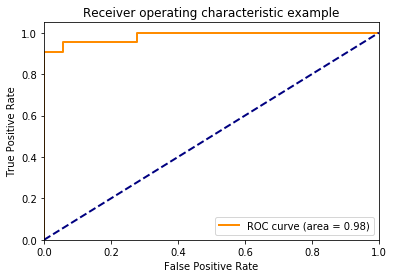

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

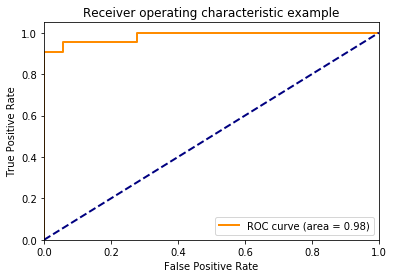

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_binary_auc(y_true, y_pred_proba):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_proba)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

plot_binary_auc(y_test, y_score[:,1])

In [9]:
y_score[:,1]

array([0.97092168, 0.98780221, 0.01351899, 0.07964282, 0.13149844,
       0.01425743, 0.95576692, 0.00594711, 0.01970557, 0.91938843,
       0.61767855, 0.7186192 , 0.64620446, 0.08345253, 0.09341848,
       0.95877446, 0.28775357, 0.97080502, 0.38758201, 0.81902586,
       0.18877991, 0.73492896, 0.24100718, 0.04106804, 0.97624393,
       0.05409407, 0.94138773, 0.92680406, 0.32458598, 0.02436672,
       0.07907338, 0.99029104, 0.94630284, 0.10954679, 0.06840543,
       0.76067548, 0.25855715, 0.9987324 , 0.8891224 , 0.86489061])

In [10]:
y_array = np.vstack((y_test, y_score[:,1]))
print(y_array)

[[1.         1.         0.         0.         1.         0.
  1.         0.         0.         1.         1.         1.
  1.         0.         0.         1.         0.         1.
  0.         1.         0.         1.         0.         0.
  1.         0.         1.         1.         1.         0.
  0.         1.         1.         0.         0.         1.
  0.         1.         1.         1.        ]
 [0.97092168 0.98780221 0.01351899 0.07964282 0.13149844 0.01425743
  0.95576692 0.00594711 0.01970557 0.91938843 0.61767855 0.7186192
  0.64620446 0.08345253 0.09341848 0.95877446 0.28775357 0.97080502
  0.38758201 0.81902586 0.18877991 0.73492896 0.24100718 0.04106804
  0.97624393 0.05409407 0.94138773 0.92680406 0.32458598 0.02436672
  0.07907338 0.99029104 0.94630284 0.10954679 0.06840543 0.76067548
  0.25855715 0.9987324  0.8891224  0.86489061]]


In [11]:
import numpy as np
import pandas as pd

def recall_at_depth(y_true, y_pred_proba, depth):
    assert depth == float(depth)
    assert depth <= 1.0
    assert depth >= 0.0
    assert len(y_true) == len(y_pred_proba)
    y_array = np.vstack((y_true, y_pred_proba))
    y_array = np.flip(y_array[:,y_array[1,:].argsort()])
    length_by_depth = int(round(len(y_true) * depth))
    return sum(y_array[1,0:length_by_depth])/sum(y_true)

def precision_at_depth(y_true, y_pred_proba, depth):
    assert depth == float(depth)
    assert depth <= 1.0
    assert depth >= 0.0
    assert len(y_true) == len(y_pred_proba)    
    y_array = np.vstack((y_true, y_pred_proba))
    y_array = np.flip(y_array[:,y_array[1,:].argsort()])
    length_by_depth = int(round(len(y_true) * depth))
    return sum(y_array[1,0:length_by_depth])/length_by_depth

def output_function(y_true, y_pred_proba):
    assert len(y_true) == len(y_pred_proba)
    y_array = np.vstack((y_true, y_pred_proba))
    y_array = np.flip(y_array[:,y_array[1,:].argsort()])
    def recall_at_depth_internal(y_array, depth):
        return sum(y_array[1,0:int(round(len(y_array[0]) * depth))])/sum(y_array[1])
    def precision_at_depth_internal(y_array, depth):
        return sum(y_array[1,0:int(round(len(y_array[0]) * depth))])/int(round(len(y_array[0]) * depth))
    def tp_at_depth_internal(y_array, depth):
        return sum(y_array[1,0:int(round(len(y_array[0]) * depth))])
    def fp_at_depth_internal(y_array, depth):
        return int(round(len(y_array[0]) * depth)) - sum(y_array[1,0:int(round(len(y_array[0]) * depth))])
    def pred_proba_at_depth(y_array, depth):
        return y_array[0,int(round(len(y_array[0]) * depth))-1]
    depth_array = np.linspace(0.05,1,20)
    cum_recall_list = list()
    cum_precision_list = list()
    cum_count_list = list()
    cum_tp_list = list()
    cum_fp_list = list()
    cum_pred_proba_list = list()
    for elem in depth_array:
        cum_recall_list.append(recall_at_depth_internal(y_array, elem))
        cum_precision_list.append(precision_at_depth_internal(y_array, elem))
        cum_count_list.append(int(round(len(y_array[0]) * elem)))
        cum_tp_list.append(tp_at_depth_internal(y_array, elem))
        cum_fp_list.append(fp_at_depth_internal(y_array, elem))
        cum_pred_proba_list.append(pred_proba_at_depth(y_array, elem))
    output_array = np.stack((depth_array, np.asarray(cum_pred_proba_list), np.asarray(cum_recall_list), 
                              np.asarray(cum_precision_list), np.asarray(cum_count_list), 
                              np.asarray(cum_tp_list), np.asarray(cum_fp_list)), axis = 1)
    output_df = pd.DataFrame(output_array)
    output_df.columns = ['Depth', 'Probability Threshold', 'Recall', 'Precision', 'Count', 'True Positives', 'False Positives']
    return output_df

output_function(y_test, y_score[:,1])

,Depth,Probability Threshold,Recall,Precision,Count,True Positives,False Positives
0,0.05,0.990291,0.090909,1.000000,2.0,2.0,0.0
1,0.10,0.976244,0.181818,1.000000,4.0,4.0,0.0
2,0.15,0.970805,0.272727,1.000000,6.0,6.0,0.0
3,0.20,0.955767,0.363636,1.000000,8.0,8.0,0.0
4,0.25,0.941388,0.454545,1.000000,10.0,10.0,0.0
5,0.30,0.919388,0.545455,1.000000,12.0,12.0,0.0
6,0.35,0.864891,0.636364,1.000000,14.0,14.0,0.0
7,0.40,0.760675,0.727273,1.000000,16.0,16.0,0.0
8,0.45,0.718619,0.818182,1.000000,18.0,18.0,0.0
9,0.50,0.617679,0.909091,1.000000,20.0,20.0,0.0
